<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-jorgefdzlara/blob/main/Notebooks_Modulo5_A01793062.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Módulo 5: Evaluación de modelos y refinamiento**

La evaluación del modelo nos indica como se desempeña un modelo en el mundo real.

La evaluación en muestras nos indica qué tan bien se aajusta nuestro modelo a los datos utilizados para entrenarlo. Pero no nos dice qué tan bien se desempeñará un modelo con nuevos datos.

La solución es dividir los datos, utilizamos datos interiores o de entrenamiento para entrenar el modelo. El resto de los datos o datos de prueba son utilizados como datos fuera de ejemplo.

Estos datos son utilizados después para aproximar a como se desempeñará nuestro modelo en el mundo real.

Separar los datos en conjuntos de entrenamiento y prueba es una parte importante de la evaluación de modelos.

Cuando se dividen los conjuntos de datos, usualmente la porción mayor de datos es utilizada para entrenamiento y la más pequeña para pruebas.

Uyilizamos un conjunto de entrenamiento para construir un modelo y encontrar relaciones predictivas.

Después utilizamos un conjunto de pruebas para evaluar el desempeño del modelo.

Una vez completadas las pruebas del modelo, deberíamos utilizar todos los datos para entrenar al modelo.




Una función popular en la paquetería **sci-kit learn** para dividir conjuntos de datos es la función **"train test split"**. Esta fuinción divide de forma aleatoria un conjunto de datos a subconjuntos de entrenamiento y pruebas.




## **Desempeño del error de generalización**

El error de generalización es una medida de qué tan bien se desempeñan nuestros datos al predecir datos no vistos previamente.

El error que obtenemos utilizando nuestros datos de prueba es un aproximado de este error.

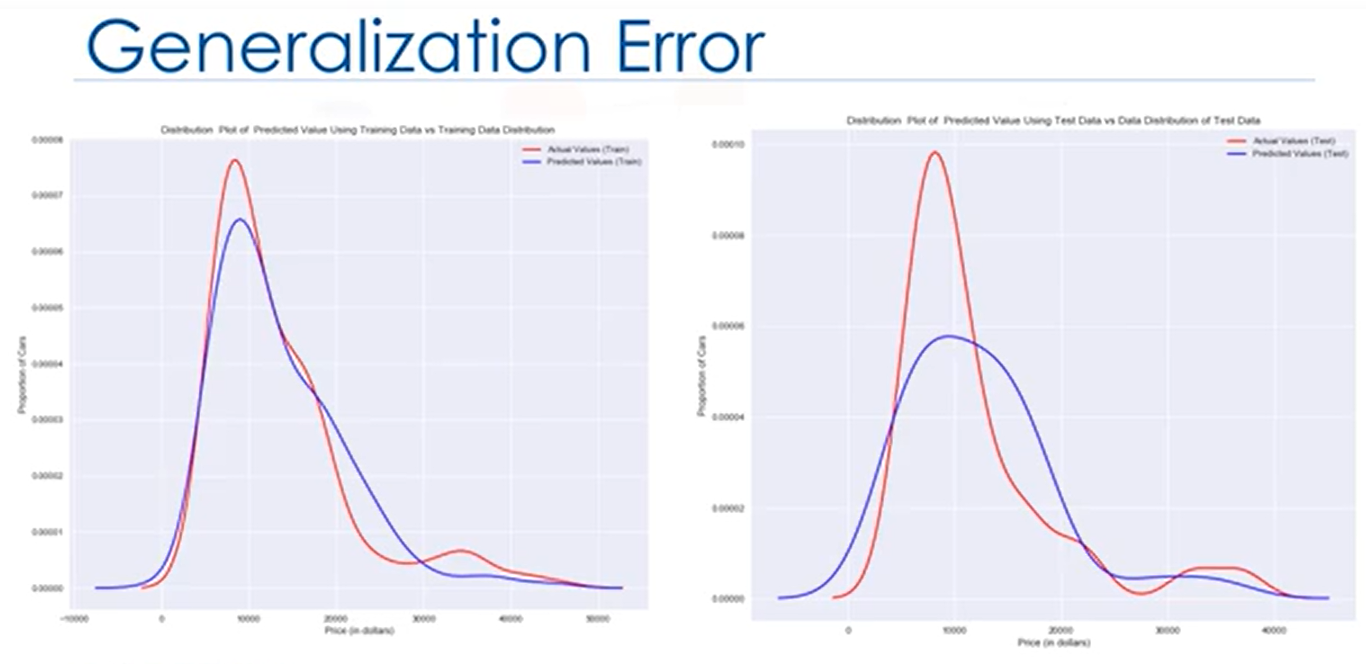

Utilizar un gran número de datos en nuestro entrenamiento, nos da promedios precisos para determinar como se desempeñará nuestro modelo en el mundo real, pero la precisión del desempeño será baja. Para evitar ese problema se utiliza la validación cruzada.

## **Validación cruzada**
Es la métrica de evaluación más común. Tiene un uso más efectivo de los datos. Cada observación es utilizada tanto para entrenar como para probar.

En éste método el conjunto de datos se divide en grupos iguales k, cada uno es llamado "fold".

Algunos de los dobleces pueden ser utilizados como conjuntos de entrenamiento, los cuales utilizaremos para entrenar el modelo. Y los restantes son utilizados como conjunto de pruebas, los cuales utilizamos para probar el modelo.

Se va cambiando la combinación hasta que cada partición ha sido utilizada tanto para entrenamiento como para pruebas.

Al final, se utiliza el promedio de los resultados como un estimado del error.
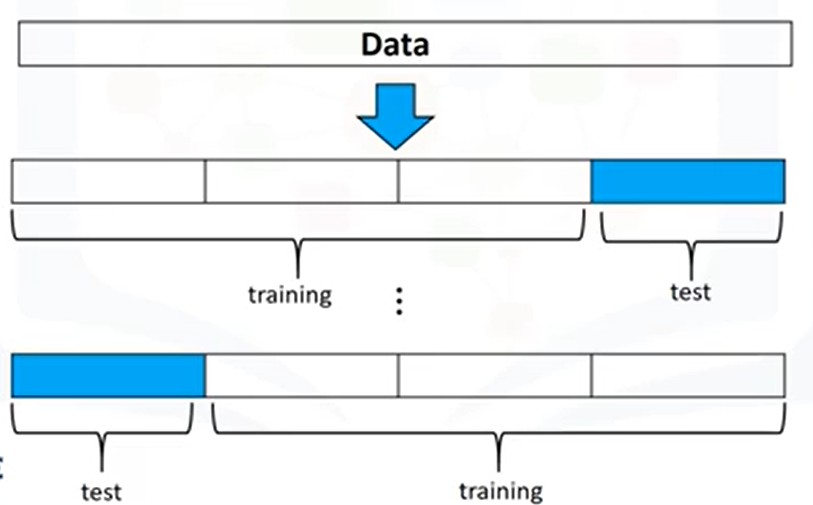




La métrica de evaluación depende del modelo, por ejemplo R^2.

La forma más simple de aplicar la validación cruzada es utilizar la función **cross_val_score()** que realiza múltiples evaluaciones 'out-of-sample'.
Este método es importado del modelo de selección de paquete de de sklearn.

**from** sklearn.model_selection **import** cross_val_score

Posteriormente utilizamos la función **cross_val_score()**

scores  = cross_val_score(lr, x_data, y_data, cv=3=

El primer parámetro de entrada es el tipo de modelo que estamos utilizando para realizar la validación cruzada. Los otros parámetros son x_data, la variable predictor y y_data, la variable objetivo. Podemos administrar el número de particiones con el parámetro cv.

La función regresa un arreglo de resultados, uno por cada partición escogida como conjunto de prueba.

Podemos promediar el resultado en conjunto para estimar la R^2 con la función mean.

np.mean(scores)


**¿Si queremos conocer los valores predichos por nuestro modelo antes de calcular los valores de R^2?**

Para esto se utilizala función **cross_val_predict()** con los mismos parámetros que en el score, pero lo que se obtiene es la predicción.

**from** sklearn.model_selection **import** cross_val_predict

yhat = cros_val_predict(lr2e, x_data, y_data, cv = 3)



## **Selección de modelos**

En esta sección discutiremos como elegir el mejor orden polinomial y los probkemas que surgen cuando se elige un orden polinomial erróneo.

Cuando el modelo es muy simple para ajustarse a los datos se llama underfitting o sub entrenado. Si se aumenta el orden de el polinomio, el modelo se ajusta mejor, pero aún no es suficientemente flexible. 

Cuando un modelo es demasiado flexible y se ajusta al ruido en vez del modelo se llama sobre entrenado (over fitted).

Siempre existe un error y es aleatorio, por lo que no se puede predecir, en ocasiones se refiere a él como error irreducible. 


## **Regresión de Ridge**

La regresión de Ridge previene el sobre entrenamiento. 

La regresión de Ridge controla la magnitud de los coeficientes polinomiales introduciendo el parámetro alfa. alfa es un parámetro que se elige antes de ajustar o entrenar el modelo. Al aumentar el valor de alfa, los coeficientes del polinomio disminuyen. Esto es más evidente para ordenes polinomiales más altos, pero alfa debe ser seleccionada cuidadosamente.

Si alfa es muy grande, los coeficientes se acercarán a cero, y sub entrenaro los datos. Si alfa es cero, el sobre entrenamiento es evidente. 

Para seleccionar alfa, utilizamos cross validation.


Para hacer una predicción utilizando la regresión ridge, importamos ridge de sklearn lineal models. 

**from** sklearn.lineal_model **import** Ridge

Creamos un Ridge utilizando un constructor. El parámetro alfa es uno de los parámetros del constructor. 

RigeModel = Ridge(alpha=0.1)

Entrenamos el modelo utilizando el método fit.

RigeModel.fit(X,y)

Para hacer una predicción utilizamos el método predict.

Yhat=RigeModel.predict(X)


Para determinar el valor alfa, utilizamos unos datos para entrenamiento. Utilizamops un segundo conjunto llamado datos de validación, es similar a los datos de entrenamiento, pero son utilizados para seleccionar parámetros como alfa.

Cpmenzamos con un valor pequeño de alfa, entrenamos el modelo, hacemos una predicción utilizando los datos de de validación. Luego calculamos el valor de R cuadrada y almacenamos los valores.

Repetimos el valor para un volumen de alfa mayor.

Entrenamos el modelo de nuevo, hacemos una predicción utilizando los datos de validación, luego calculamos los valores de R cuadrada y almacenamos los valores de R cuadrada.

Repetimos el proceso pra diferentes valores de alfa, entrenando el modelo y generando una predicción. Selecciamos el valor que maximiza R cuadrada. 

**Nota:** Podemos utilizar otras métricas para seleccionar el valor de alfa como el MSE (Error cuadrao promedio).

El problema de sobreentrenamiento es aún peor cuando tenemos muchas variables. 



## **Gridge Search (Búsqueda de malla)**

Nos permite buscar entre múltiples parámetros libres copn pocas líneas de código. Parámetros como alfa no forman parte del proceso de ajuste o entrenamiento. Estos valores son llamados hyperparámetros.

Sci-kit learn tiene formas de iterar automáticamente sobre estos hyperparámetros utilizando cross validation. A éste método se le llama Grid search.

Grid search toma el modelo u objetos que quisieras entrenar, y diferentes valores de los hyperparámetros. después calcula el MSE o R^2 para diferentes valores de hyperparámetros. 

1. Primero importamos las librerías que necesitamos incluyendo el ojeto Grisearch CV.
> **from** sklearn.linear_model **import** Ridge
> **from** sklearn.model_selection **import** GridSearchCV

2. Los valores del diccionario de parámetros.
> parameters1 = [{'alpha' :[0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000[}]

3. Creamos un modelo de Ridge u objeto
> RR=Ridge()

4. Creamos un objeto de GridSearch CV. Las entradas son el objeto de regresión de Ridge, los valores de parámetros, y el número de folds. 
> Grid1 = GridSearchCV(Rr, parameters1, cv=4)

5. Ajustamos el modelo 
> Grid1.fit(x_data[['horsepower','curb-weight','engine-size','highway-mpg']],y_data)

6. Podemos encontrar los mejores valores utilizando el atributo mejor estimador.
> Grid1.best_estimator_

7. Podemos también obtener información como el MSE en los datos de validación utilizando el atributo cv result.
> scores=Grid1.cv_results_
> scores=['mean_test_score']

In [7]:

!pip install pandas 

!pip install matplotlib
!pip install scipy
!pip install seaborn
!pip install ipywidgets
!pip install tqdm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 16.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
filename='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'

In [11]:
from pandas.io.parsers.readers import read_csv
df=pd.read_csv(filename)
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [12]:
from ipywidgets import interact, interactive, fixed, interact_manual

## **Funciones para graficar**

In [13]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [14]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

# **Entrenamiento y Prueba**

Una parte importante durante la prueba de tu modelo es dividir los datos en  datos de entrenamiento y prueba. Vamos a ubicar el precio objetivo en un conjunto de datos por separado y_data:

In [15]:
y_data = df['price']

In [16]:
x_data=df.drop('price',axis=1)

In [17]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 21
number of training samples: 180


In [18]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 81
number of training samples: 120


In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lre=LinearRegression()

In [21]:
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [22]:
lre.score(x_test[['horsepower']], y_test)

0.36358755750788263

In [23]:
lre.score(x_train[['horsepower']], y_train)

0.6619724197515104

In [24]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
lre.fit(x_train1[['horsepower']],y_train1)
lre.score(x_test1[['horsepower']],y_test1)

0.7139364665406973

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

In [27]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [28]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())


The mean of the folds are 0.522009915042119 and the standard deviation is 0.291183944475603


In [29]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

In [30]:
Rc = cross_val_score(lre, x_data[['horsepower']], y_data, cv=2)
Rc.mean()

0.5166761697127429

In [31]:
from sklearn.model_selection import cross_val_predict

In [32]:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

# **Parte 2: Sobre entrenamiento, subentrenamiento y selección de modelo**

Resulta que la prueba de datos, a veces llamdo como "out of sample data", es una forma mejor para medir que tan bien tu modelo se comporta en el mundo real. Una razón para esto es sobre entrenamiento.

Vamos a ver unos ejemplos. Resulta que estas diferencias son más aparentes en la Regresión lineal múltiple y regresión polinomial entonces exploraremos el sobreentrenamiento en este contexto.

Vamos a crear objetos de regresión lineal múltiple y entrenar el modelo utilizando 'horsepower', 'curb-weight', 'engine-size' y 'highway-mpg' como variables.

In [33]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [34]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [35]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


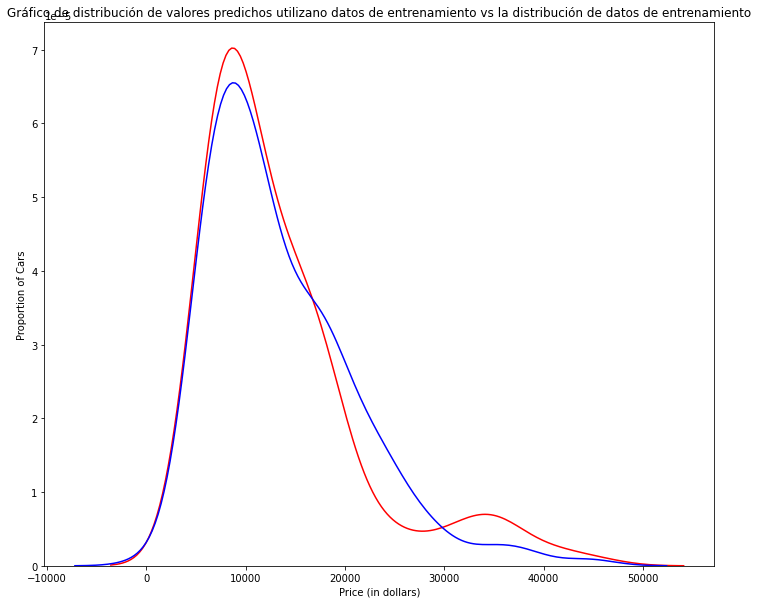

In [37]:
Title = 'Gráfico de distribución de valores predichos utilizano datos de entrenamiento vs la distribución de datos de entrenamiento'
DistributionPlot(y_train, yhat_train, "Valores reales (Train)", "Valores predichos (Train)", Title)

Figura 1: Gráfico de valores predichos utilizando los datos de entrenamiento comparados con los valores reales de los datos de entrenamiento.

Hasta ahora, el modelo parece comportarse adecuadamente aprendiendo del conjunto de datos de entrenamiento. Pero qué pasa cuando el modelo se encuentra nuevos datos del conjunto de datos de prueba?  Cuando el modelo genera nuevos valores desde el conjunto de datos de prueba, odemos observar que la distribución de los valores predichos es muy diferente de los valores reales del objetivo.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


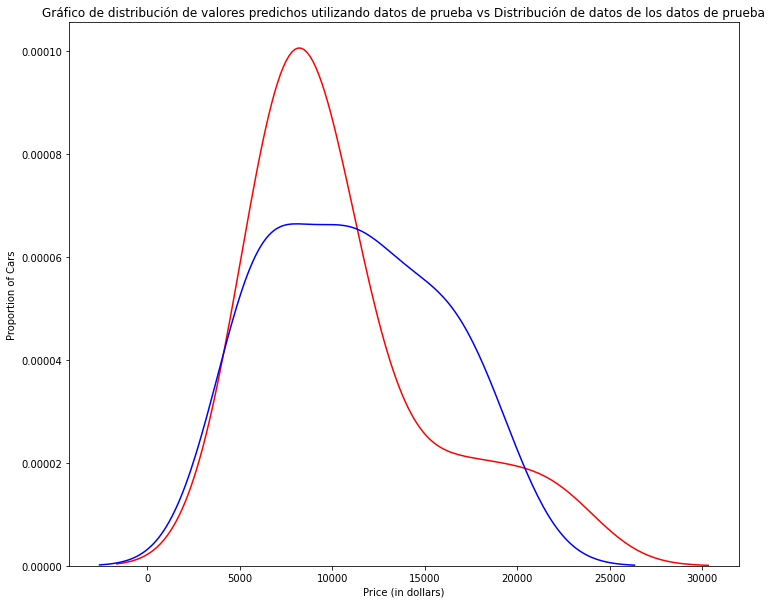

In [38]:
Title='Gráfico de distribución de valores predichos utilizando datos de prueba vs Distribución de datos de los datos de prueba'
DistributionPlot(y_test,yhat_test,"Valores reales (Test)","Valores predichos (Test)",Title)

Figura 2: Gráfico de valores predichos utilizando los datos de prueba comparados con los valores reales de los datos de prueba.

Comparando la figura 1 y 2, resulta evidente que la distribución de los datos de la figura 1 es mucho mejor ajustando los datos. Esta diferencia en la figura 2 es aparente en el rango de 5000 a 15,000. Ahí es donde la forma de la distribución es extremadamente diferente. Vamos a ver si una regresión polinomial también exhibe una caída en la exactitud de la predicción uando se analiza el conjunto de datos de prueba.

In [39]:
from sklearn.preprocessing import PolynomialFeatures

# **Sobreentrenamiento**

El sobreentrenamiento se presenta cuando el modelo se ajusta al ruido, pero no al proceso principal. Por lo tanto, cuando se prueba el modelo utilizando el conjunto de prueba, tu modelo no se comporta bien, ya que modela el ruido, no el proceso que generó la relación.


In [40]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [41]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [42]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [43]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.65561887,  7307.98782321, 12213.78770965, 18893.24804015,
       19995.95195136])

In [44]:
print("Valores predichos:", yhat[0:4])
print("Valores reales:", y_test[0:4].values)

Valores predichos: [ 6728.65561887  7307.98782321 12213.78770965 18893.24804015]
Valores reales: [ 6295. 10698. 13860. 13499.]


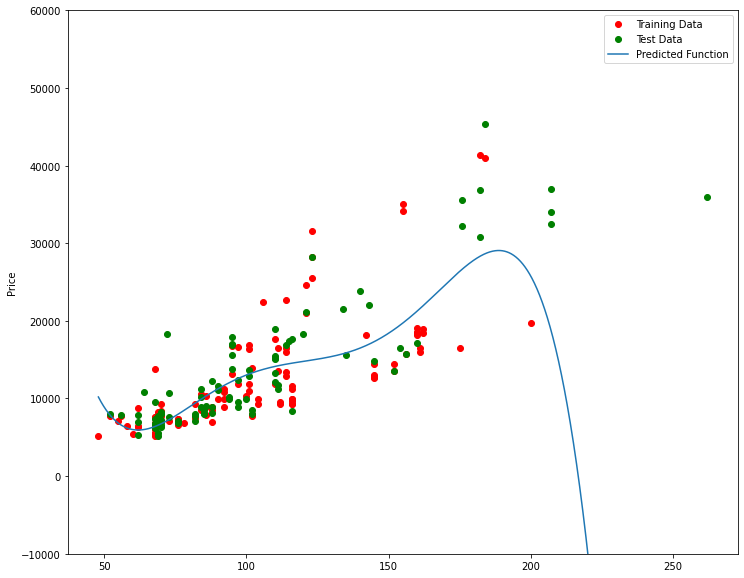

In [45]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

In [46]:
poly.score(x_train_pr, y_train)

0.556771690212023

In [47]:
poly.score(x_test_pr, y_test)

-29.87134030204415

Text(3, 0.75, 'Maximum R^2 ')

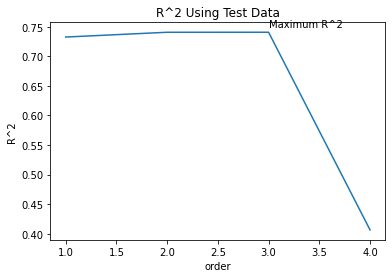

In [48]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ') 

In [49]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [50]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [51]:
pr1 = PolynomialFeatures(degree=2)

In [52]:
x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [53]:
x_train_pr1.shape

(110, 15)

In [54]:
poly1=LinearRegression().fit(x_train_pr1,y_train)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


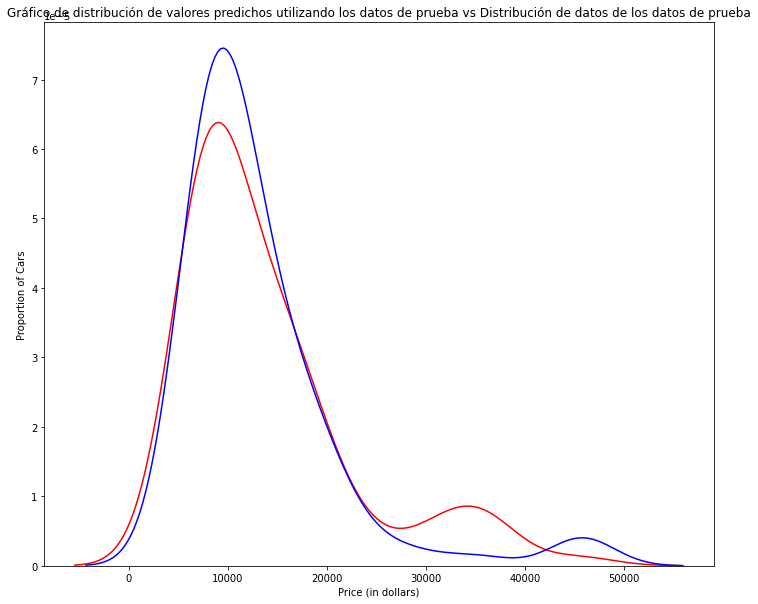

In [55]:
yhat_test1=poly1.predict(x_test_pr1)

Title='Gráfico de distribución de valores predichos utilizando los datos de prueba vs Distribución de datos de los datos de prueba'

DistributionPlot(y_test, yhat_test1, "Valores reales (Test)", "Valores predichos (Test)", Title)

In [56]:
#El valor precicho es mayor al valor real de los carros donde el precio es del rango de $10,000. De forma contraria el precio predicho es menor al predicho en el rango de $30,000 a $40,000. Por lo tanto el modelo no es tan preciso en estos rangos.

# **Parte 3: Regresión Ridge**



In [57]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [58]:
from sklearn.linear_model import Ridge

In [59]:
RigeModel=Ridge(alpha=1)

In [60]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [61]:
yhat = RigeModel.predict(x_test_pr)

In [63]:
print('predicho:', yhat[0:4])
print('conjunto de prueba :', y_test[0:4].values)

predicho: [ 6570.82441941  9636.2489147  20949.92322737 19403.60313256]
conjunto de prueba : [ 6295. 10698. 13860. 13499.]


In [64]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Score de prueba": test_score, "Score de entrenamiento": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:10<00:00, 99.53it/s, Score de prueba=0.564, Score de entrenamiento=0.859]


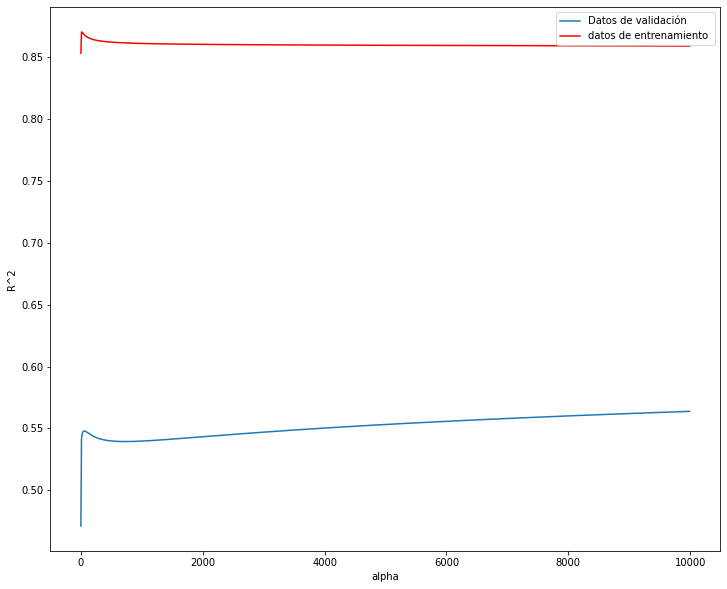

In [66]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='Datos de validación  ')
plt.plot(Alpha,Rsqu_train, 'r', label='datos de entrenamiento ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [67]:
RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.5418576440206702

# **Parte 4: Grid Search**

El término alpha es un hiperparámetro. SKlearn tiene la clase GridSearchCV para hacer el proceso de encontrar el mejor hiperparámetro más simple.


In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [70]:
RR=Ridge()
RR

Ridge()

In [71]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [72]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [73]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [74]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036151